In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fashion Data
## Data Cleaning

In [2]:
fashion_df_init = pd.read_csv('fashion_data_pre_clean.csv')
fashion_df = pd.DataFrame()

fashion_df_init

,Date,Market Cap,Revenue,Earnings,PE,Absolute PE,PS
0,"Wed, 05 Apr 2023",UK£12.4b,UK£6.1b,UK£657.2m,13.2x,18.9x,2.1x
1,"Sun, 18 Dec 2022",UK£11.0b,UK£6.1b,UK£676.5m,14.1x,16.3x,1.8x
2,"Thu, 01 Sep 2022",UK£10.6b,UK£6.0b,UK£644.9m,12.8x,16.5x,1.8x
3,"Mon, 16 May 2022",UK£9.8b,UK£5.5b,UK£579.1m,19.1x,16.9x,1.8x
4,"Fri, 28 Jan 2022",UK£11.8b,UK£5.3b,UK£568.0m,34.7x,20.8x,2.2x
5,"Tue, 12 Oct 2021",UK£12.7b,UK£4.9b,UK£369.7m,47.6x,34.3x,2.6x
6,"Sat, 26 Jun 2021",UK£15.4b,UK£4.7b,UK£365.2m,44.8x,42.2x,3.3x
7,"Wed, 10 Mar 2021",UK£13.7b,UK£4.6b,UK£159.4m,46.3x,86.2x,3x
8,"Sun, 22 Nov 2020",UK£6.7b,UK£3.9b,UK-£123.8,148.4x,-54.3x,1.7x
9,"Thu, 06 Aug 2020",UK£6.2b,UK£4.3b,UK-£64.1m,48.6x,-97.3x,1.4x


### Clean With Dates

In [3]:
fashion_df_init['Date'] = pd.to_datetime(fashion_df_init['Date'])
fashion_df['date'] = fashion_df_init['Date']
fashion_df['month'] = fashion_df_init['Date'].dt.month
fashion_df['year'] = fashion_df_init['Date'].dt.year

### Clean with Market Cap Data

In [4]:
fashion_df_init['Market Cap'] = fashion_df_init['Market Cap'].astype(str)
fashion_df_init['Market Cap'] = fashion_df_init['Market Cap'].str.extract('([0-9]+[,./]*[0-9]*)') # extract decimal from string
fashion_df_init['Market Cap'] = fashion_df_init['Market Cap'].astype(float)
fashion_df['Market Cap'] = fashion_df_init['Market Cap'].mul(1e9)  # value is in billions

### Clean with Revenue Data

In [5]:
fashion_df_init['Revenue'] = fashion_df_init['Revenue'].astype(str)
fashion_df_init['Revenue'] = fashion_df_init['Revenue'].str.extract('([0-9]+[,./]*[0-9]*)') # extract decimal from string
fashion_df_init['Revenue'] = fashion_df_init['Revenue'].astype(float)
fashion_df['Revenue'] = fashion_df_init['Revenue'].mul(1e9)  # value is in billions

### Clean with Earnings Data

In [6]:
fashion_df_init['Earnings'] = fashion_df_init['Earnings'].astype(str)
fashion_df_init['Earnings'] = fashion_df_init['Earnings'].str.extract('([0-9]+[,./]*[0-9]*)') # extract decimal from string
fashion_df_init['Earnings'] = fashion_df_init['Earnings'].astype(float)
fashion_df['Earnings'] = fashion_df_init['Earnings'].mul(1e6)  # value is in millions

### Clean with PE Data

In [7]:
fashion_df_init['PE'] = fashion_df_init['PE'].astype(str)
fashion_df_init['PE'] = fashion_df_init['PE'].str.extract('([0-9]+[,./]*[0-9]*)') # extract decimal from string
fashion_df['PE'] = fashion_df_init['PE'].astype(float)

### Clean with Absolute PE Data

In [8]:
fashion_df_init['Absolute PE'] = fashion_df_init['Absolute PE'].astype(str)
fashion_df_init['Absolute PE'] = fashion_df_init['Absolute PE'].str.extract('([0-9]+[,./]*[0-9]*)') # extract decimal from string
fashion_df['Absolute PE'] = fashion_df_init['Absolute PE'].astype(float)

### Clean with PS Data

In [9]:
fashion_df_init['PS'] = fashion_df_init['PS'].astype(str)
fashion_df_init['PS'] = fashion_df_init['PS'].str.extract('([0-9]+[,./]*[0-9]*)') # extract decimal from string
fashion_df['PS'] = fashion_df_init['PS'].astype(float)

In [10]:
fashion_df

,date,month,year,Market Cap,Revenue,Earnings,PE,Absolute PE,PS
0,2023-04-05,4,2023,1.240000e+10,6.100000e+09,657200000.0,13.2,18.9,2.1
1,2022-12-18,12,2022,1.100000e+10,6.100000e+09,676500000.0,14.1,16.3,1.8
2,2022-09-01,9,2022,1.060000e+10,6.000000e+09,644900000.0,12.8,16.5,1.8
3,2022-05-16,5,2022,9.800000e+09,5.500000e+09,579100000.0,19.1,16.9,1.8
4,2022-01-28,1,2022,1.180000e+10,5.300000e+09,568000000.0,34.7,20.8,2.2
5,2021-10-12,10,2021,1.270000e+10,4.900000e+09,369700000.0,47.6,34.3,2.6
6,2021-06-26,6,2021,1.540000e+10,4.700000e+09,365200000.0,44.8,42.2,3.3
7,2021-03-10,3,2021,1.370000e+10,4.600000e+09,159400000.0,46.3,86.2,3.0
8,2020-11-22,11,2020,6.700000e+09,3.900000e+09,123800000.0,148.4,54.3,1.7
9,2020-08-06,8,2020,6.200000e+09,4.300000e+09,64100000.0,48.6,97.3,1.4


## Data Visualization

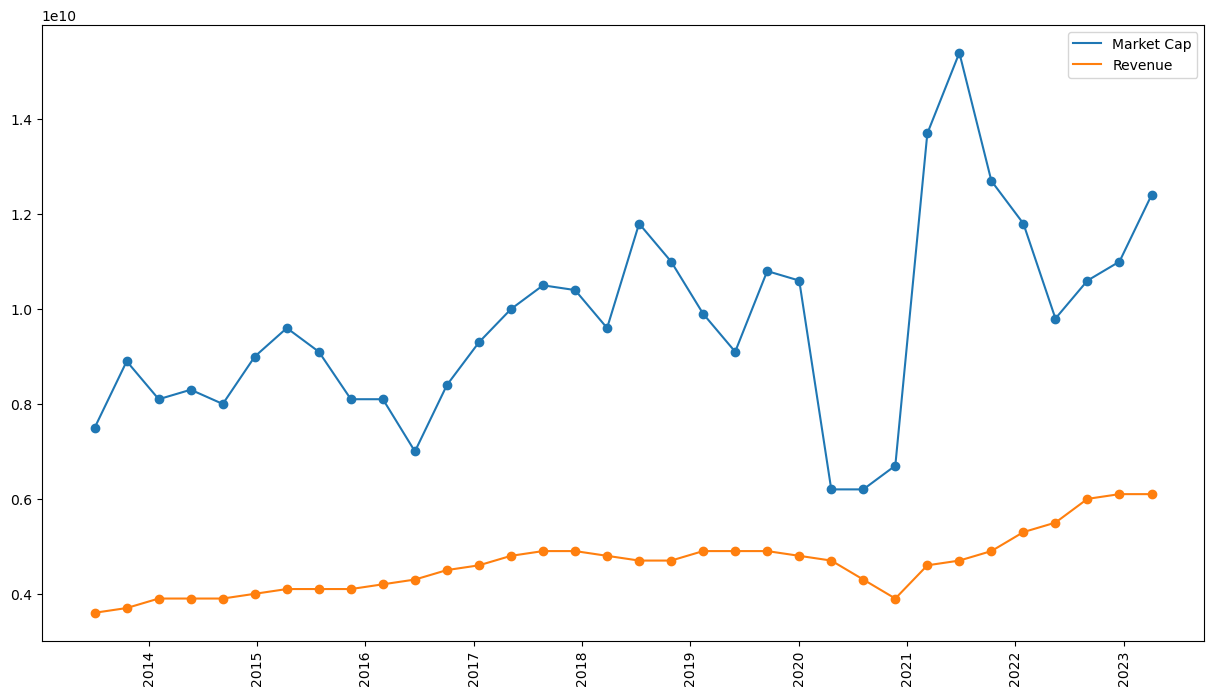

In [11]:
fashion_df = fashion_df.sort_values('date', ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_df['date'], fashion_df['Market Cap'], label='Market Cap')
axes.scatter(fashion_df['date'], fashion_df['Market Cap'])
axes.plot(fashion_df['date'], fashion_df['Revenue'], label='Revenue')
axes.scatter(fashion_df['date'], fashion_df['Revenue'])
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

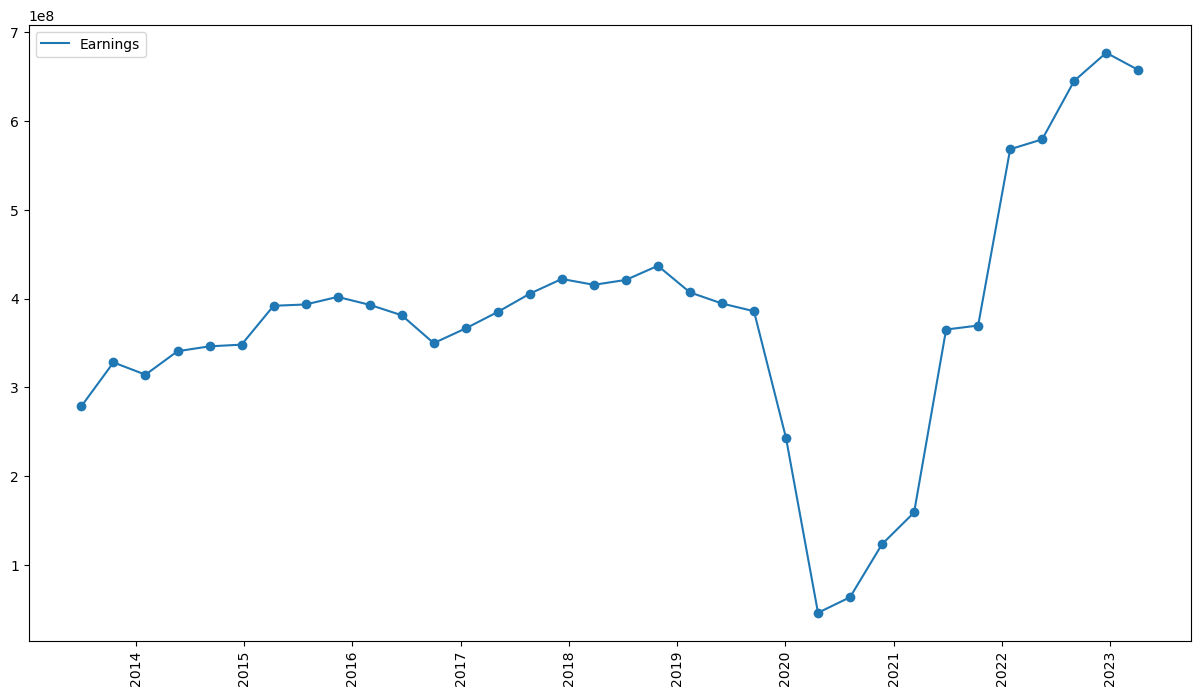

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_df['date'], fashion_df['Earnings'], label='Earnings')
axes.scatter(fashion_df['date'], fashion_df['Earnings'])
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

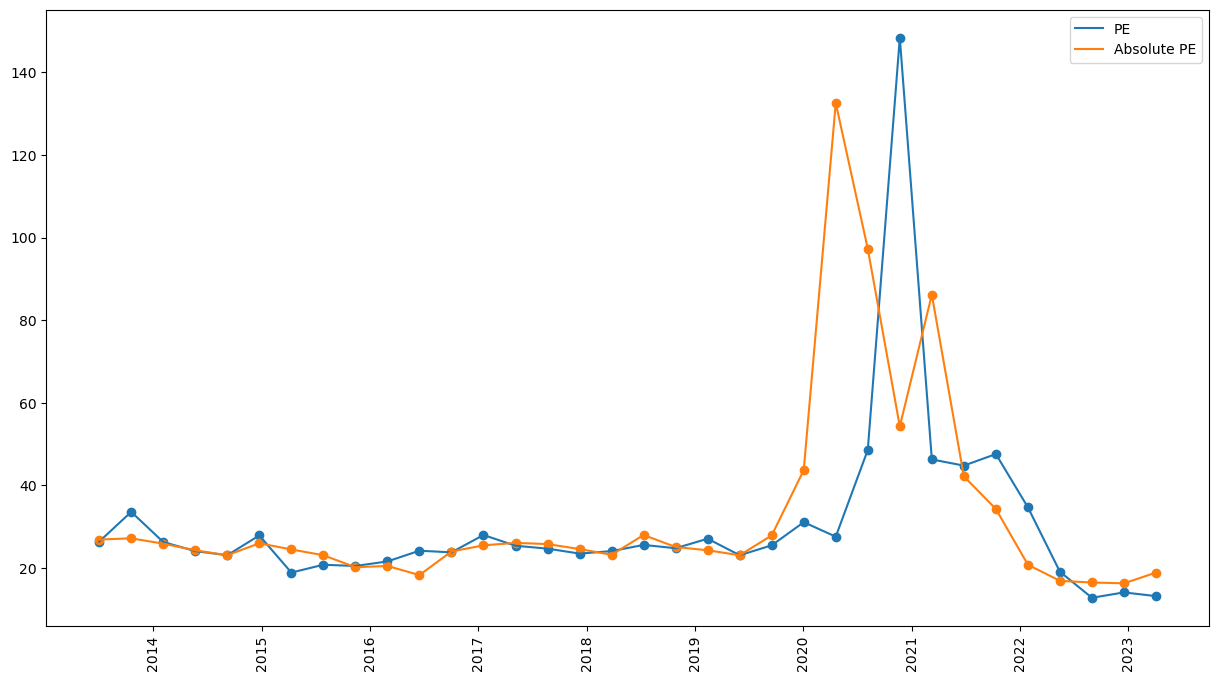

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_df['date'], fashion_df['PE'], label='PE')
axes.scatter(fashion_df['date'], fashion_df['PE'])
axes.plot(fashion_df['date'], fashion_df['Absolute PE'], label='Absolute PE')
axes.scatter(fashion_df['date'], fashion_df['Absolute PE'])

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

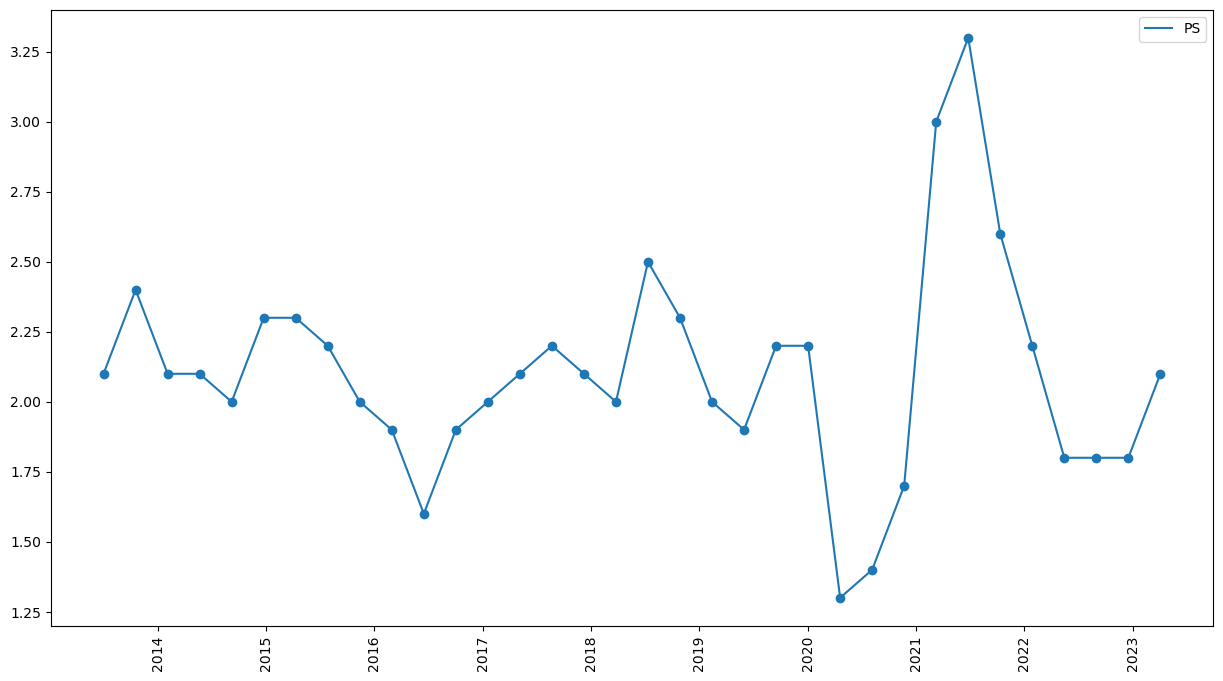

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_df['date'], fashion_df['PS'], label='PS')
axes.scatter(fashion_df['date'], fashion_df['PS'])
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

## Interpolation

In [18]:
# set index to datetime
fashion_df = fashion_df.set_index('date')
fashion_df

,month,year,Market Cap,Revenue,Earnings,PE,Absolute PE,PS
date,,,,,,,,
2013-07-02,7,2013,7.500000e+09,3.600000e+09,279000000.0,26.4,26.9,2.1
2013-10-18,10,2013,8.900000e+09,3.700000e+09,328200000.0,33.6,27.2,2.4
2014-02-03,2,2014,8.100000e+09,3.900000e+09,314400000.0,26.3,25.9,2.1
2014-05-22,5,2014,8.300000e+09,3.900000e+09,340800000.0,24.1,24.3,2.1
2014-09-07,9,2014,8.000000e+09,3.900000e+09,346300000.0,23.1,23.1,2.0
2014-12-24,12,2014,9.000000e+09,4.000000e+09,348200000.0,27.9,26.0,2.3
2015-04-11,4,2015,9.600000e+09,4.100000e+09,391900000.0,18.9,24.5,2.3
2015-07-28,7,2015,9.100000e+09,4.100000e+09,393400000.0,20.8,23.1,2.2
2015-11-13,11,2015,8.100000e+09,4.100000e+09,401900000.0,20.5,20.2,2.0


In [19]:
# create a dataframe over the range from 2013-2023
temp_fash = pd.DataFrame()
date_range = pd.date_range(start='2013-07-02', end='2023-05-05', freq='M')
temp_fash['date'] = date_range
temp_fash['month'] = temp_fash['date'].dt.month
temp_fash['year'] = temp_fash['date'].dt.year
temp_fash.drop('date', axis=1, inplace=True)

# set datetime in temp_fash from month and year
temp_fash['date'] = pd.to_datetime(temp_fash['year'].astype(str) + temp_fash['month'].astype(str), format='%Y%m')

# merge the two datasets based on the year and month
fashion_interp_df = pd.merge(fashion_df, temp_fash, how='outer', on=['month','year'])
fashion_interp_df = fashion_interp_df.sort_values(by=["year", 'month'])
fashion_interp_df.reset_index(drop=True, inplace=True)

fashion_interp_df

,month,year,Market Cap,Revenue,Earnings,PE,Absolute PE,PS,date
0,7,2013,7.500000e+09,3.600000e+09,279000000.0,26.4,26.9,2.1,2013-07-01
1,8,2013,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-01
2,9,2013,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-01
3,10,2013,8.900000e+09,3.700000e+09,328200000.0,33.6,27.2,2.4,2013-10-01
4,11,2013,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-01
...,...,...,...,...,...,...,...,...,...
113,12,2022,1.100000e+10,6.100000e+09,676500000.0,14.1,16.3,1.8,2022-12-01
114,1,2023,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01
115,2,2023,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-01
116,3,2023,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01


#### Market Cap and Revenue

In [20]:
# interpolate columns
fashion_interp_df['Market Cap'] = fashion_interp_df['Market Cap'].interpolate(method='polynomial', order=2).round(1)
fashion_interp_df['Revenue'] = fashion_interp_df['Revenue'].interpolate(method='polynomial', order=2).round(1)

fashion_interp_df

,month,year,Market Cap,Revenue,Earnings,PE,Absolute PE,PS,date
0,7,2013,7.500000e+09,3.600000e+09,279000000.0,26.4,26.9,2.1,2013-07-01
1,8,2013,8.216451e+09,3.624305e+09,NaN,NaN,NaN,NaN,2013-08-01
2,9,2013,8.683118e+09,3.657638e+09,NaN,NaN,NaN,NaN,2013-09-01
3,10,2013,8.900000e+09,3.700000e+09,328200000.0,33.6,27.2,2.4,2013-10-01
4,11,2013,8.867098e+09,3.751390e+09,NaN,NaN,NaN,NaN,2013-11-01
...,...,...,...,...,...,...,...,...,...
113,12,2022,1.100000e+10,6.100000e+09,676500000.0,14.1,16.3,1.8,2022-12-01
114,1,2023,1.122992e+10,6.108512e+09,NaN,NaN,NaN,NaN,2023-01-01
115,2,2023,1.153989e+10,6.111349e+09,NaN,NaN,NaN,NaN,2023-02-01
116,3,2023,1.192992e+10,6.108512e+09,NaN,NaN,NaN,NaN,2023-03-01


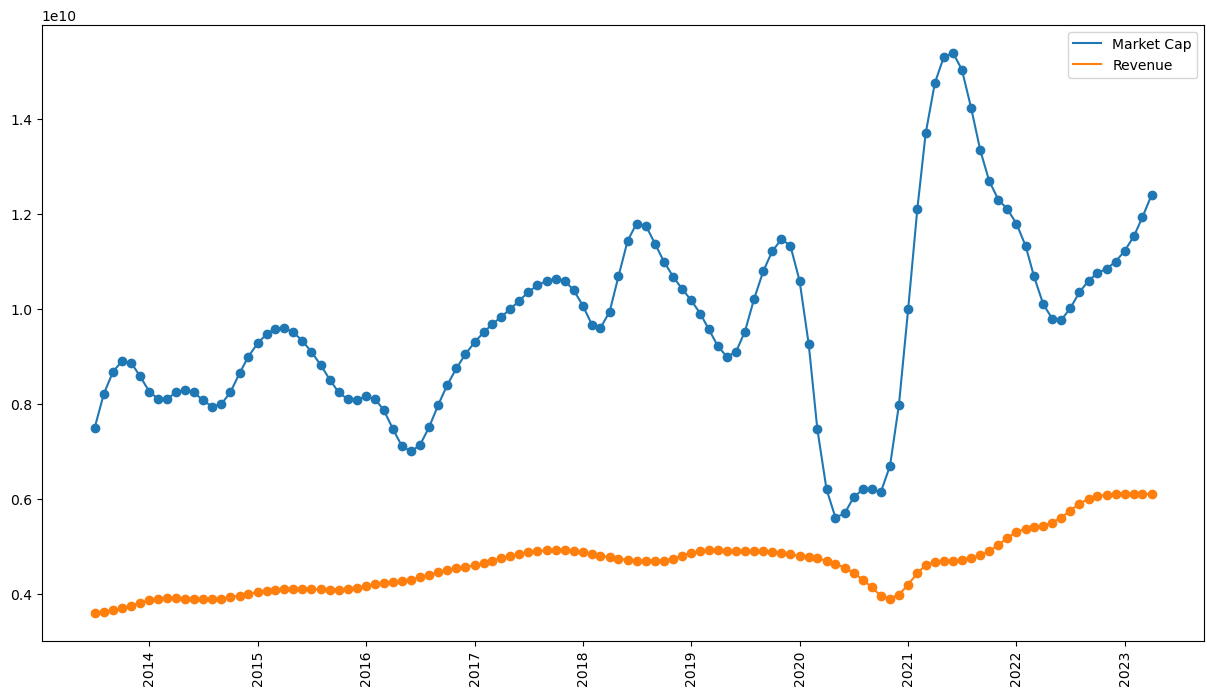

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_interp_df['date'], fashion_interp_df['Market Cap'], label='Market Cap')
axes.scatter(fashion_interp_df['date'], fashion_interp_df['Market Cap'])
axes.plot(fashion_interp_df['date'], fashion_interp_df['Revenue'], label='Revenue')
axes.scatter(fashion_interp_df['date'], fashion_interp_df['Revenue'])

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

#### Earnings

In [22]:
# interpolate columns
fashion_interp_df['Earnings'] = fashion_interp_df['Earnings'].interpolate(method='polynomial', order=2).round(1)

fashion_interp_df

,month,year,Market Cap,Revenue,Earnings,PE,Absolute PE,PS,date
0,7,2013,7.500000e+09,3.600000e+09,279000000.0,26.4,26.9,2.1,2013-07-01
1,8,2013,8.216451e+09,3.624305e+09,303128569.9,NaN,NaN,NaN,2013-08-01
2,9,2013,8.683118e+09,3.657638e+09,319528569.9,NaN,NaN,NaN,2013-09-01
3,10,2013,8.900000e+09,3.700000e+09,328200000.0,33.6,27.2,2.4,2013-10-01
4,11,2013,8.867098e+09,3.751390e+09,329142860.2,NaN,NaN,NaN,2013-11-01
...,...,...,...,...,...,...,...,...,...
113,12,2022,1.100000e+10,6.100000e+09,676500000.0,14.1,16.3,1.8,2022-12-01
114,1,2023,1.122992e+10,6.108512e+09,678401072.7,NaN,NaN,NaN,2023-01-01
115,2,2023,1.153989e+10,6.111349e+09,675818096.9,NaN,NaN,NaN,2023-02-01
116,3,2023,1.192992e+10,6.108512e+09,668751072.7,NaN,NaN,NaN,2023-03-01


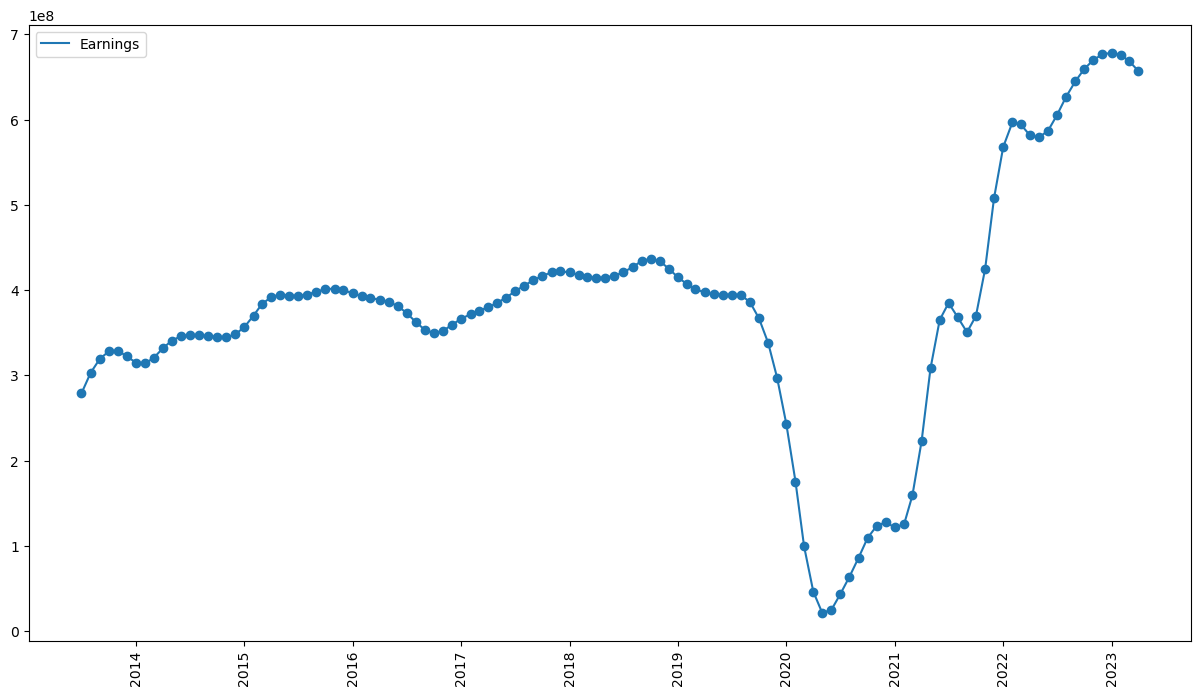

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_interp_df['date'], fashion_interp_df['Earnings'], label='Earnings')
axes.scatter(fashion_interp_df['date'], fashion_interp_df['Earnings'])
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

#### PE and Absolute PE

In [24]:
# interpolate columns
fashion_interp_df['PE'] = fashion_interp_df['PE'].interpolate(method='polynomial', order=2).round(1)
fashion_interp_df['Absolute PE'] = fashion_interp_df['Absolute PE'].interpolate(method='polynomial', order=1).round(1)

fashion_interp_df[4:15]

,month,year,Market Cap,Revenue,Earnings,PE,Absolute PE,PS,date
4,11,2013,8.867098e+09,3.751390e+09,329142860.2,32.9,26.9,NaN,2013-11-01
5,12,2013,8.584411e+09,3.811808e+09,322357150.6,30.8,26.6,NaN,2013-12-01
6,1,2014,8.259519e+09,3.866322e+09,315042865.7,28.2,26.2,NaN,2014-01-01
7,2,2014,8.100000e+09,3.900000e+09,314400000.0,26.3,25.9,2.1,2014-02-01
8,3,2014,8.105854e+09,3.912842e+09,320428553.6,25.2,25.4,NaN,2014-03-01
9,4,2014,8.242227e+09,3.907512e+09,331828535.4,24.6,24.8,NaN,2014-04-01
10,5,2014,8.300000e+09,3.900000e+09,340800000.0,24.1,24.3,2.1,2014-05-01
11,6,2014,8.244320e+09,3.892971e+09,346042956.3,23.5,24.0,NaN,2014-06-01
12,7,2014,8.075186e+09,3.886426e+09,347557404.3,22.7,23.7,NaN,2014-07-01
13,8,2014,7.943459e+09,3.886667e+09,347068150.2,22.4,23.4,NaN,2014-08-01


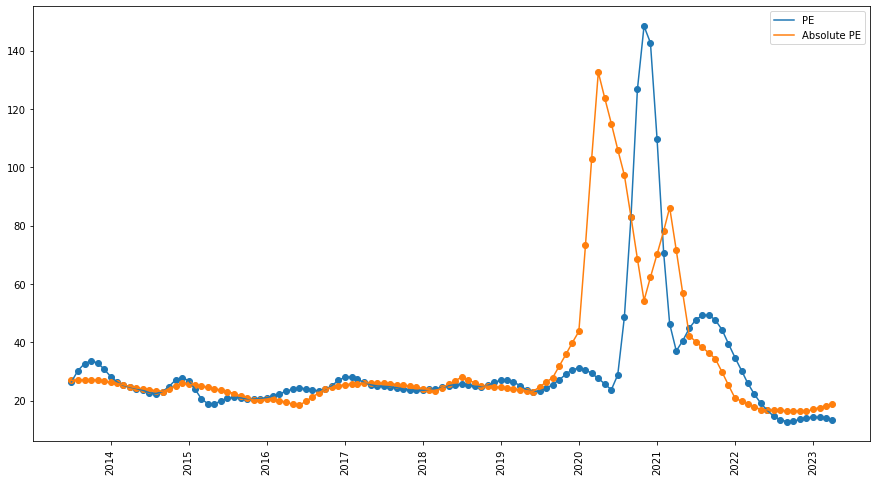

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_interp_df['date'], fashion_interp_df['PE'], label='PE')
axes.scatter(fashion_interp_df['date'], fashion_interp_df['PE'])
axes.plot(fashion_interp_df['date'], fashion_interp_df['Absolute PE'], label='Absolute PE')
axes.scatter(fashion_interp_df['date'], fashion_interp_df['Absolute PE'])

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

#### PS

In [23]:
# interpolate columns
fashion_interp_df['PS'] = fashion_interp_df['PS'].interpolate(method='polynomial', order=2).round(1)

fashion_interp_df

,month,year,Market Cap,Revenue,Earnings,PE,Absolute PE,PS,date
0,7,2013,7.500000e+09,3.600000e+09,279000000.0,26.4,26.9,2.1,2013-07-01
1,8,2013,8.216451e+09,3.624305e+09,303128569.9,30.3,27.0,2.3,2013-08-01
2,9,2013,8.683118e+09,3.657638e+09,319528569.9,32.7,27.1,2.4,2013-09-01
3,10,2013,8.900000e+09,3.700000e+09,328200000.0,33.6,27.2,2.4,2013-10-01
4,11,2013,8.867098e+09,3.751390e+09,329142860.2,32.9,26.9,2.4,2013-11-01
...,...,...,...,...,...,...,...,...,...
113,12,2022,1.100000e+10,6.100000e+09,676500000.0,14.1,16.3,1.8,2022-12-01
114,1,2023,1.122992e+10,6.108512e+09,678401072.7,14.3,17.0,1.8,2023-01-01
115,2,2023,1.153989e+10,6.111349e+09,675818096.9,14.2,17.6,1.9,2023-02-01
116,3,2023,1.192992e+10,6.108512e+09,668751072.7,13.9,18.2,2.0,2023-03-01


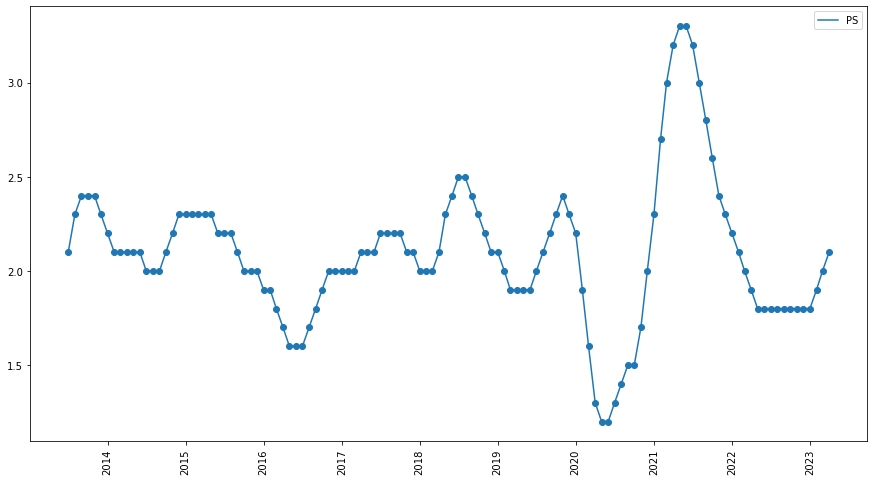

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(fashion_interp_df['date'], fashion_interp_df['PS'], label='PS')
axes.scatter(fashion_interp_df['date'], fashion_interp_df['PS'])
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

#### Save CSV

In [27]:
fashion_interp_df.to_csv('./datasets/Ben/fashion_dataset.csv')


# Interest Rates Data

## Visualize Data

In [61]:
interest_df_init = pd.read_csv('DP_LIVE_10052023160703395.csv')
interest_df = pd.DataFrame()
# interest_df_init['Date Changed'] = interest_df_init['Date Changed'].apply(lambda x : "-".join(x.split()))
interest_df_init

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,GBR,LTINT,TOT,PC_PA,M,2012-12,1.8467,NaN
1,GBR,LTINT,TOT,PC_PA,M,2013-01,2.0795,NaN
2,GBR,LTINT,TOT,PC_PA,M,2013-02,2.1781,NaN
3,GBR,LTINT,TOT,PC_PA,M,2013-03,1.9768,NaN
4,GBR,LTINT,TOT,PC_PA,M,2013-04,1.7824,NaN
...,...,...,...,...,...,...,...,...
120,GBR,LTINT,TOT,PC_PA,M,2022-12,3.5015,NaN
121,GBR,LTINT,TOT,PC_PA,M,2023-01,3.5115,NaN
122,GBR,LTINT,TOT,PC_PA,M,2023-02,3.5553,NaN
123,GBR,LTINT,TOT,PC_PA,M,2023-03,3.5638,NaN


In [62]:
# convert to datetime

interest_df['date'] = pd.to_datetime(interest_df_init['TIME'], format='%Y-%m-%d')
interest_df['month'] = interest_df['date'].dt.month
interest_df['year'] = interest_df['date'].dt.year
interest_df['Interest Rate'] = interest_df_init['Value']

interest_df

,date,month,year,Interest Rate
0,2012-12-01,12,2012,1.8467
1,2013-01-01,1,2013,2.0795
2,2013-02-01,2,2013,2.1781
3,2013-03-01,3,2013,1.9768
4,2013-04-01,4,2013,1.7824
...,...,...,...,...
120,2022-12-01,12,2022,3.5015
121,2023-01-01,1,2023,3.5115
122,2023-02-01,2,2023,3.5553
123,2023-03-01,3,2023,3.5638


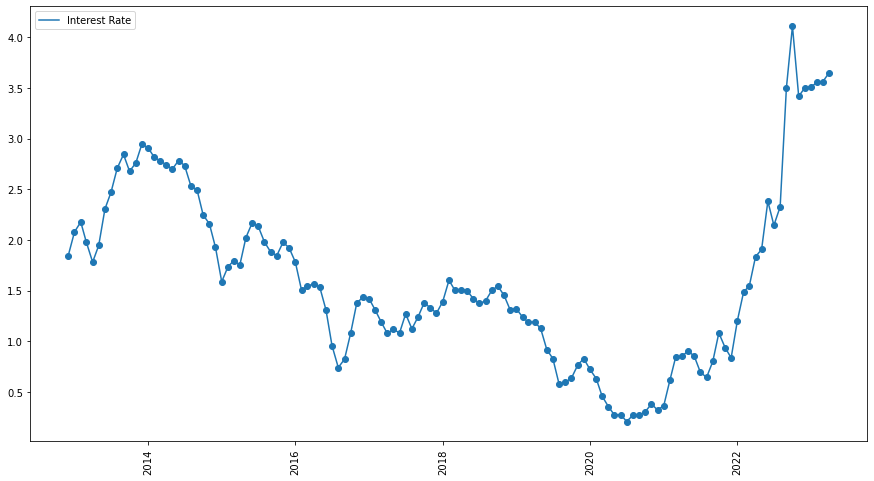

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

axes.plot(interest_df['date'], interest_df['Interest Rate'], label='Interest Rate')
axes.scatter(interest_df['date'], interest_df['Interest Rate'])
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

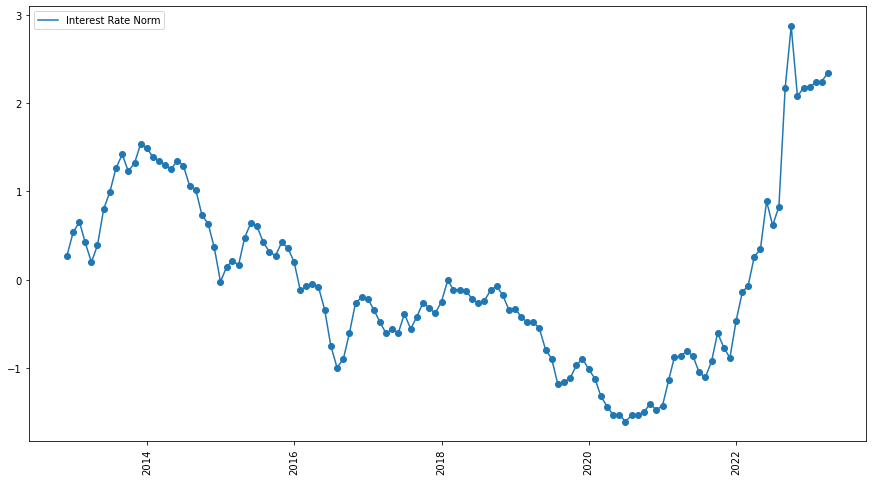

In [64]:
mean = interest_df['Interest Rate'].mean()
std = interest_df['Interest Rate'].std()
interest_df['Interest Rate Norm'] = interest_df['Interest Rate'].apply(lambda x: (x-mean)/std)
interest_df

fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.plot(interest_df['date'], interest_df['Interest Rate Norm'], label='Interest Rate Norm')
axes.scatter(interest_df['date'], interest_df['Interest Rate Norm'])
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

### The ADF confidence value is too low (0.287) for us to consider the data stationary

In [65]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(interest_df['Interest Rate Norm'].values)
result



(-2.1817751559194045,
 0.21292638804402975,
 11,
 113,
 {'1%': -3.489589552580676,
  '5%': -2.887477210140433,
  '10%': -2.580604145195395},
 -23.421780904451566)

### So we use differencing to make it sstationary

In [66]:
interest_df['Interest Rate Norm Diff'] = interest_df['Interest Rate Norm'].diff(periods=1)
interest_df['Interest Rate Norm Diff2'] = interest_df['Interest Rate Norm Diff'].diff(periods=1)


interest_df
interest_df = interest_df.drop([0,1,2])


# fig, axes = plt.subplots(1, 1, figsize=(15, 8))
# axes.plot(interest_df['date'], interest_df['Interest Rate Norm Diff'], label='Interest Rate Norm Diff')
# axes.scatter(interest_df['date'], interest_df['Interest Rate Norm Diff'])
# plt.legend()
# plt.xticks(rotation='vertical')
# plt.show()

In [67]:
interest_df['Interest Rate Norm Diff'].isnull().values.any()
interest_df

,date,month,year,Interest Rate,Interest Rate Norm,Interest Rate Norm Diff,Interest Rate Norm Diff2
3,2013-03-01,3,2013,1.9768,0.423391,-0.231140,-0.344356
4,2013-04-01,4,2013,1.7824,0.200174,-0.223217,0.007923
5,2013-05-01,5,2013,1.9462,0.388255,0.188081,0.411298
6,2013-06-01,6,2013,2.3063,0.801735,0.413480,0.225399
7,2013-07-01,7,2013,2.4710,0.990850,0.189115,-0.224365
...,...,...,...,...,...,...,...
120,2022-12-01,12,2022,3.5015,2.174107,0.096911,0.892065
121,2023-01-01,1,2023,3.5115,2.185590,0.011482,-0.085429
122,2023-02-01,2,2023,3.5553,2.235882,0.050293,0.038810
123,2023-03-01,3,2023,3.5638,2.245642,0.009760,-0.040533


In [68]:
result = adfuller(interest_df['Interest Rate Norm Diff2'].values)
result

(-5.763577779220777,
 5.599233670128403e-07,
 9,
 112,
 {'1%': -3.4901313156261384,
  '5%': -2.8877122815688776,
  '10%': -2.5807296460459184},
 -15.97044994279679)

### Log norm also works for interest df but ignore to be consistent with other features

In [69]:
# interest_df['Interest Rate LogNorm'] = np.log(abs(interest_df['Interest Rate Norm']))
# fig, axes = plt.subplots(1, 1, figsize=(15, 8))
# axes.plot(interest_df['date'], interest_df['Interest Rate NormDiff'], label='Interest Rate LogNorm')
# axes.scatter(interest_df['date'], interest_df['Interest Rate NormDiff'])
# plt.legend()
# plt.xticks(rotation='vertical')
# plt.show()

In [70]:
# result = adfuller(interest_df['Interest Rate LogNorm'].values)
# result

#### Save csv

In [71]:
interest_df.to_csv('./datasets/Ben/interest_rates_dataset.csv')